In [84]:
import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

This is exploratory Analysis.
My Stakeholder is a real estate company, working with home owners looking to sell their homes.
My recommendations should assist them in making changes to their homes before listing, in order to increase the price of the home.

In [85]:
df = pd.read_csv('kc_house_data.csv')

In [86]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['house_age'] = df

In [ ]:
def age(renovated, built):
    

In [87]:
#here I want to look at which columns have nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [88]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [89]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

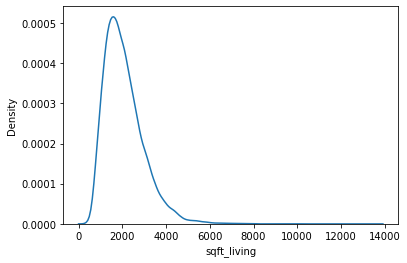

In [90]:
sns.kdeplot(df['sqft_living'])

This is right skewed 
We can either:
    - log the data
    - remove outliers
I think I will remove outliers

In [91]:
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [92]:
# I am going to take data 2 standard deviations out from the mean, then look at the data
max_val = df['sqft_living'].mean() + (df['sqft_living'].std() * 2)
min_val = df['sqft_living'].mean() - (df['sqft_living'].std() * 2)
min_val,max_val

(244.10960009681935, 3916.5341004171414)

In [93]:
sqft_2sd_df = df.loc[(df['sqft_living'] > min_val) & (df['sqft_living'] < max_val)]


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

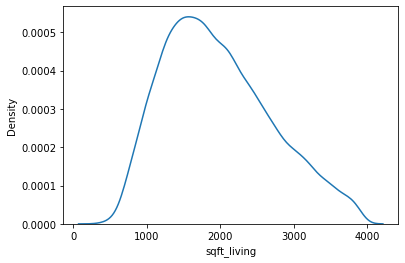

In [94]:
sns.kdeplot(sqft_2sd_df['sqft_living'])

Text(0.5, 1.0, 'Frequency of House Square footage')

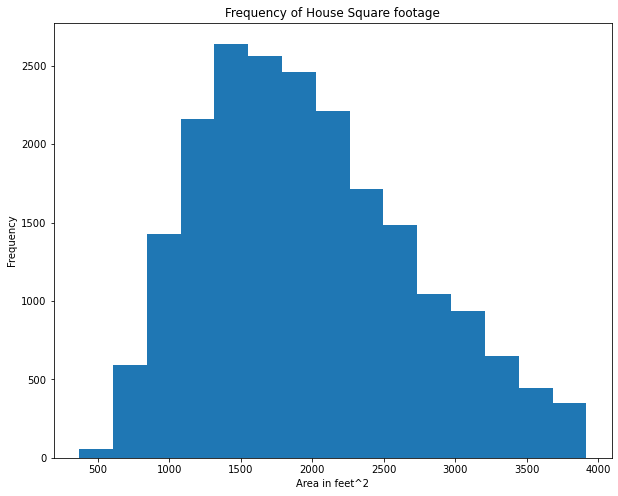

In [95]:
#plotting a histogram
x = sqft_2sd_df['sqft_living']
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(x, bins=15)
ax.set_xlabel('Area in feet^2')
ax.set_ylabel('Frequency')
ax.set_title("Frequency of House Square footage")


Creating a singular linear regression model with area vs price

In [151]:
simple_X = df['sqft_living']
simple_Y = df['price']
simple_X_cons = sm.add_constant(simple_X)
simple_model = sm.OLS(endog = simple_Y, exog = simple_X_cons).fit()
simple_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:20:12   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [124]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [125]:
X_multi = df.select_dtypes(include=['float','int64'])
X_multi = X_multi.drop(['price','yr_renovated','lat','long','zipcode','id','sqft_lot','sqft_living15','sqft_lot15'],axis=1)
Y_multi = df['price']
X_multi.isna().sum()

bedrooms       0
bathrooms      0
sqft_living    0
floors         0
sqft_above     0
yr_built       0
dtype: int64

In [126]:
X_multi_cons = sm.add_constant(X_multi)
model_multi = sm.OLS(endog=Y_multi,exog=X_multi_cons).fit()
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     4493.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:14:51   Log-Likelihood:            -2.9864e+05
No. Observations:               21597   AIC:                         5.973e+05
Df Residuals:                   21590   BIC:                         5.974e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.65e+06   1.38e+05     48.269      0.000    6.38e+06    6.92e+06
bedrooms    -6.762e+04   2249.469    -30.058      0.000    -7.2e+04   -6.32e+04
bathrooms    6.999e+04   3917.262     17.867      0.000    6.23e+04    7.77e+04
sqft_living   292.1201      4.838     60.380      0.000     282.637     301.603
floors       5.255e+04   4169.100     12.605      0.000    4.44e+04    6.07e+04
sqft_above      9.7798      4.893      1.999      0.046       0.189      19.370
yr_built    -3416.4940     71.425    -47.833      0.000   -3556.493   -3276.495
==============================================================================
Omnibus:                    14376.841   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           531630.520
Skew:                           2.694   Prob(JB):                         0.00
Kurtosis:                      26.702   Cond. No.                     2.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# We are dropping sqft_above, to see if theres a difference

In [128]:
X_multi = df.select_dtypes(include=['float','int64'])
X_multi = X_multi.drop(['price','lat','yr_renovated','long','zipcode','id','sqft_lot','sqft_living15','sqft_lot15','sqft_above'],axis=1)
Y_multi = df['price']
X_multi.isna().sum()

bedrooms       0
bathrooms      0
sqft_living    0
floors         0
yr_built       0
dtype: int64

In [129]:
X_multi_cons = sm.add_constant(X_multi)
model_multi = sm.OLS(endog=Y_multi,exog=X_multi_cons).fit()
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     5390.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:14:57   Log-Likelihood:            -2.9864e+05
No. Observations:               21597   AIC:                         5.973e+05
Df Residuals:                   21591   BIC:                         5.973e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.595e+06   1.35e+05     48.875      0.000    6.33e+06    6.86e+06
bedrooms    -6.772e+04   2249.043    -30.109      0.000   -7.21e+04   -6.33e+04
bathrooms    6.858e+04   3853.252     17.797      0.000     6.1e+04    7.61e+04
sqft_living   299.7786      2.954    101.482      0.000     293.989     305.569
floors       5.609e+04   3773.923     14.864      0.000    4.87e+04    6.35e+04
yr_built    -3388.3705     70.030    -48.384      0.000   -3525.635   -3251.106
==============================================================================
Omnibus:                    14381.045   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           533336.192
Skew:                           2.694   Prob(JB):                         0.00
Kurtosis:                      26.741   Cond. No.                     2.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
# It seems from our model that bedrooms, bathrooms, sqft_living, floors and yr_built are all statistically significant to our model


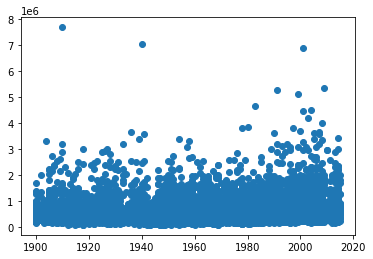

In [131]:
# looking at year built
year_data = df[df['yr_renovated'].notna()]
plt.scatter(year_data['yr_built'],year_data['price'])

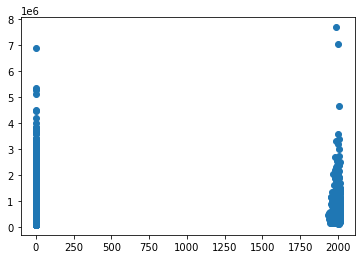

In [132]:
plt.scatter(year_data['yr_renovated'],year_data['price'])


In [133]:
year_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [134]:
#drop all zeros
year_data = year_data.loc[year_data['yr_renovated'] != 0]

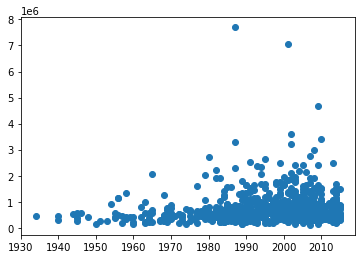

In [135]:
plt.scatter(year_data['yr_renovated'],year_data['price'])

In [136]:
year_data['price'].min()

110000.0

In [137]:
year_data['price'].max()

7700000.0

Now trying categorical predictors, specifically CONDITION

In [138]:
print(df.shape)
df_sig_cols = df.drop(['id','date','sqft_lot', 'waterfront', 'view','sqft_above', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15','grade'],axis=1)
df_no_nulls = df_sig_cols.dropna(axis=0)
Y_multi_no_nulls = df_no_nulls['price']
df_no_nulls = df_no_nulls.drop('price', axis = 1)
print(df_no_nulls.shape)

(21597, 21)
(17755, 7)


In [139]:
X_ohe =pd.get_dummies(df_no_nulls,drop_first= True)
X_ohe.head()
all_mod = sm.OLS(endog=Y_multi_no_nulls, exog=sm.add_constant(X_ohe)).fit()
all_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2261.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:15:05   Log-Likelihood:            -2.4551e+05
No. Observations:               17755   AIC:                         4.910e+05
Df Residuals:                   17744   BIC:                         4.911e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.145e+06   1.68e+05     36.550      0.000    5.82e+06    6.47e+06
bedrooms            -6.791e+04   2460.945    -27.595      0.000   -7.27e+04   -6.31e+04
bathrooms            6.574e+04   4298.454     15.294      0.000    5.73e+04    7.42e+04
sqft_living           301.6843      3.248     92.887      0.000     295.318     308.050
floors               5.557e+04   4229.600     13.139      0.000    4.73e+04    6.39e+04
yr_built            -3163.0163     86.692    -36.486      0.000   -3332.941   -2993.091
yr_renovated           26.7208      4.912      5.440      0.000      17.093      36.349
condition_Fair      -4.778e+04   2.07e+04     -2.308      0.021   -8.84e+04   -7199.210
condition_Good       1.426e+04   4619.280      3.087      0.002    5205.450    2.33e+04
condition_Poor      -3.305e+04   5.12e+04     -0.645      0.519   -1.33e+05    6.74e+04
condition_Very Good  4.176e+04   7407.077      5.638      0.000    2.72e+04    5.63e+04
==============================================================================
Omnibus:                    12230.264   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507930.836
Skew:                           2.795   Prob(JB):                         0.00
Kurtosis:                      28.600   Cond. No.                     2.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

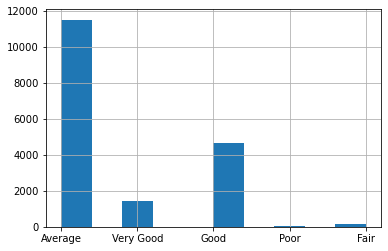

In [140]:
df_no_nulls['condition'].hist()

In [141]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Iterative Modeling Begin

In [142]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [118]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [152]:
df = pd.read_csv('kc_house_data.csv')

In [195]:
X_bedrooms_sqft = df.drop(['id', 'date', 'bathrooms', 
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above',  'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],axis = 1)

X_bedrooms_sqft = X_bedrooms_sqft.loc[(X_bedrooms_sqft['sqft_basement'] != '?')]
X_bedrooms_sqft['sqft_basement'] = X_bedrooms_sqft['sqft_basement'].astype(float)
X_bedrooms_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   sqft_living    21143 non-null  int64  
 3   floors         21143 non-null  float64
 4   sqft_basement  21143 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 991.1 KB


In [199]:
Y_bedrooms_sqft = X_bedrooms_sqft['price']
X_bedrooms_sqft = X_bedrooms_sqft.drop('price',axis=1)
X_bedrooms_sqft_cons = sm.add_constant(X_bedrooms_sqft)


#X_bedrooms_sqft.isna().sum()


In [200]:
model = sm.OLS(endog=Y_bedrooms_sqft, exog=X_bedrooms_sqft_cons).fit()

In [202]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5471.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:13   Log-Likelihood:            -2.9346e+05
No. Observations:               21143   AIC:                         5.869e+05
Df Residuals:                   21138   BIC:                         5.870e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.952e+04   7831.551      8.877      0.000    5.42e+04    8.49e+04
bedrooms      -5.884e+04   2356.954    -24.966      0.000   -6.35e+04   -5.42e+04
sqft_living     304.1135      2.845    106.909      0.000     298.538     309.689
floors         1.702e+04   3997.628      4.258      0.000    9186.579    2.49e+04
sqft_basement    38.3173      5.067      7.562      0.000      28.386      48.249
==============================================================================
Omnibus:                    14159.701   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491758.772
Skew:                           2.740   Prob(JB):                         0.00
Kurtosis:                      25.982   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
946.0         1
906.0         1
2196.0        1
1990.0        1
556.0         1
Name: sqft_basement, Length: 304, dtype: int64